In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# IPython Magic Functions
# will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

# Defaults fot better plots
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

# Turn on interactive mode
plt.ion() 
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

### Abrindo os Datasets

In [2]:
dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

In [3]:
### Get datset CSVs
csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

[PosixPath('../../dataset/music4all/id_tags.csv'),
 PosixPath('../../dataset/music4all/id_metadata.csv'),
 PosixPath('../../dataset/music4all/id_information.csv'),
 PosixPath('../../dataset/music4all/listening_history.csv'),
 PosixPath('../../dataset/music4all/id_lang.csv'),
 PosixPath('../../dataset/music4all/id_genres.csv')]

### Carrega os datasets em dataframes

In [4]:
datasets = {}

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

### Quantos artistas, músicas e álbuns temos no dataset ?

In [75]:
# Selecting an appropriate dataframe for the task

datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

In [58]:
df_info = datasets["id_information"]

In [97]:
unique = df_info.nunique()
print(unique)
print(f"\nSongs: {unique[0]}\nArtists: {unique[1]}\nAlbuns: {unique[3]}")

id            109269
artist         16269
song           87915
album_name     38363
dtype: int64

Songs: 109269
Artists: 16269
Albuns: 38363


<AxesSubplot:title={'center':'Musicas, artistas, musicas únicas e albuns'}>

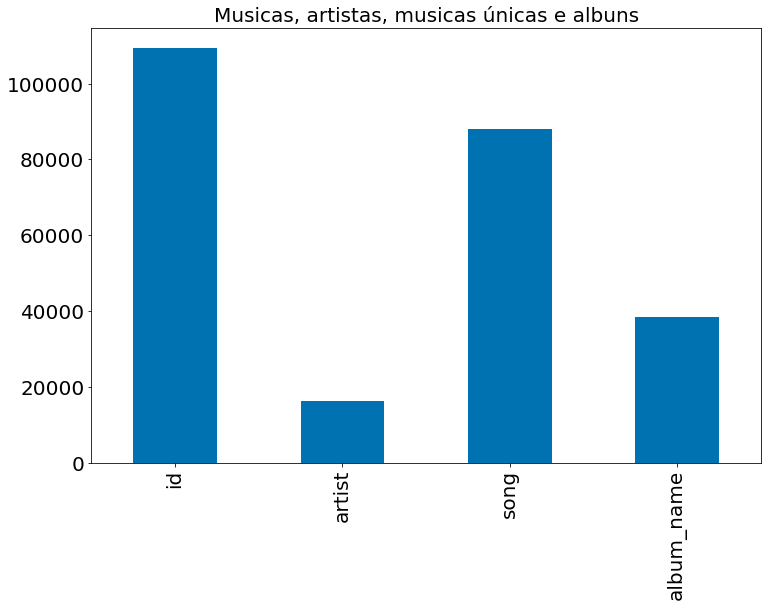

In [99]:
unique.plot.bar(title="Musicas, artistas, musicas únicas e albuns")

### Qual a distribuição de gêneros ?

In [91]:
genres = ",".join(genres_df['genres']).split(",")
genres[:10]

['pop',
 'underground hip hop',
 'hard rock',
 'rock',
 'classic rock',
 'symphonic metal',
 'power metal',
 'symphonic power metal',
 'post-punk',
 'new wave']

In [92]:
# Genres comes in a list for every song separated by commas
# We join into a big string, then count each genre. A genre can have multiple words
genres_count = pd.Series(genres).value_counts()
most_popular_genres = genres_count[:100]

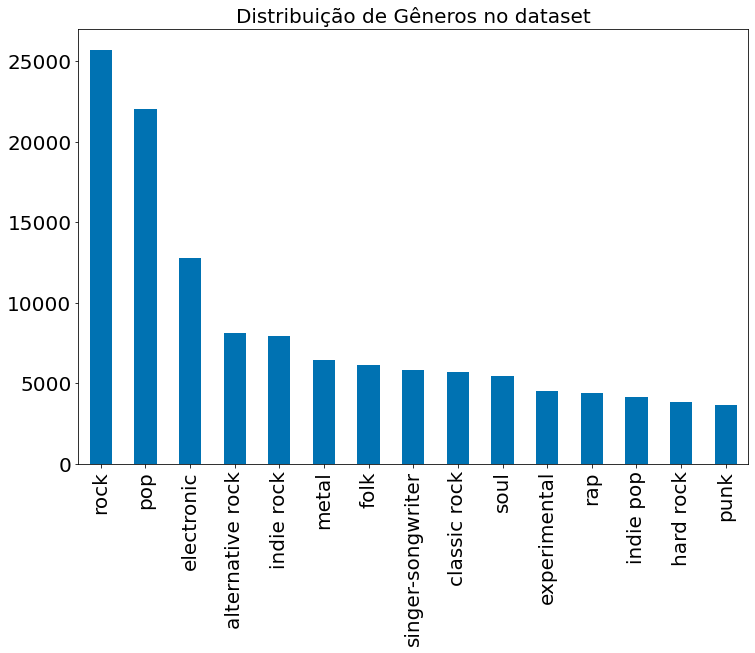

In [93]:
ax = most_popular_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

### Qual a distribuição das tags ?

In [79]:
tags_df = datasets["id_tags"]
tags_df

,id,tags
0,0009fFIM1eYThaPg,"pop,british,female vocalists,dance,cheryl cole"
1,0010xmHR6UICBOYT,"instrumental hip-hop,underground hip hop,instr..."
2,002Jyd0vN4HyCpqL,"hard rock,rock,classic rock,american artist"
3,006TYKNjNxWjfKjy,"symphonic metal,power metal,symphonic power metal"
4,007LIJOPQ4Sb98qV,"post-punk,new wave,1985"
...,...,...
109264,zzyyPUs7hC9Nz2e1,"hardcore punk,punk,hardcore,punk rock"
109265,zzz0n04uuTUA7fNh,"pop,&lt;3,omg"
109266,zzzj3LYaZtYtbzSr,"female vocalists,indie,singer-songwriter,piano..."
109267,zzznMjZAKnJJXQSj,"synthpop,80s,remix,pop"


In [89]:
# Separando as Tags
tags = ",".join(tags_df['tags']).split(",")
tags[:10]

['pop',
 'british',
 'female vocalists',
 'dance',
 'cheryl cole',
 'instrumental hip-hop',
 'underground hip hop',
 'instrumental hip hop',
 'instrumental hiphop',
 'hard rock']

In [90]:
tags_count = pd.Series(tags).value_counts()
most_popular_tags = tags_count[:100]
most_popular_tags

rock              25731
pop               22013
indie             17539
alternative       13114
electronic        12769
                  ...  
japanese            936
trap                917
male vocalists      881
garage rock         878
disco               856
Length: 100, dtype: int64

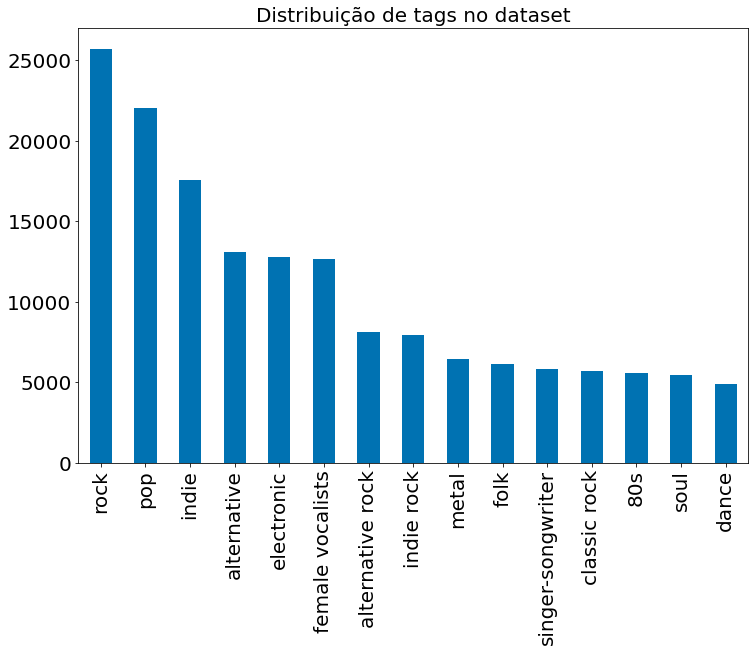

In [86]:
ax = most_popular_tags[:15].plot.bar(title="Distribuição de tags no dataset")